In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/xueleichen/PyTorch-Underwater-Image-Enhancement.git
%cd PyTorch-Underwater-Image-Enhancement


Cloning into 'PyTorch-Underwater-Image-Enhancement'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 36 (delta 5), reused 1 (delta 1), pack-reused 24 (from 1)
Receiving objects: 100% (36/36), 1.78 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/PyTorch-Underwater-Image-Enhancement


In [ ]:
# Torch and Torchvision first
!pip install torch torchvision

# Then the others
!pip install Pillow>=9.0.0 numpy>=1.24.0 opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import zipfile

def unzip_to_drive(zip_file_path, extract_to_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)
            print(f"Extracted to {extract_to_path}")
    except zipfile.BadZipFile:
        print("Invalid zip file")


In [ ]:
zip_path = '/content/drive/MyDrive/Colab Notebooks/underwater_scenes.zip'
extract_path = '/content/drive/MyDrive/Colab Notebooks/underwater_images'

unzip_to_drive(zip_path, extract_path)


Extracted to /content/drive/MyDrive/Colab Notebooks//underwater_images


In [ ]:
!ls -lh '/content/drive/MyDrive/Colab Notebooks/underwater_images/underwater_scenes'

total 13K
-rw------- 1 root root  477 May 16 12:29 INFO.txt
drwx------ 2 root root 4.0K May 16 12:30 trainA
drwx------ 2 root root 4.0K May 16 12:30 trainB
drwx------ 2 root root 4.0K May 16 12:30 validation


In [ ]:
!mkdir -p '/content/drive/MyDrive/Colab Notebooks/underwater_results/checkpoints'


In [ ]:
!python train.py '/content/drive/MyDrive/Colab Notebooks/underwater_images/underwater_scenes/trainA' '/content/drive/MyDrive/Colab Notebooks//underwater_images/underwater_scenes/trainB' --epochs 100 --batch_size 4 --lr 0.0002


Found 2185 pairs of training images
Epoch:[1/100] Loss: 0.032219
Epoch:[2/100] Loss: 0.010651
Epoch:[3/100] Loss: 0.009648
Epoch:[4/100] Loss: 0.008727
Epoch:[5/100] Loss: 0.007740
Epoch:[6/100] Loss: 0.007057
Epoch:[7/100] Loss: 0.006654
Epoch:[8/100] Loss: 0.006357
Epoch:[9/100] Loss: 0.006081
Epoch:[10/100] Loss: 0.005887
Epoch:[11/100] Loss: 0.005770
Epoch:[12/100] Loss: 0.005600
Epoch:[13/100] Loss: 0.005503
Epoch:[14/100] Loss: 0.005393
Epoch:[15/100] Loss: 0.005302
Epoch:[16/100] Loss: 0.005148
Epoch:[17/100] Loss: 0.005099
Epoch:[18/100] Loss: 0.004992
Epoch:[19/100] Loss: 0.004953
Epoch:[20/100] Loss: 0.004878
Epoch:[21/100] Loss: 0.004823
Epoch:[22/100] Loss: 0.004793
Epoch:[23/100] Loss: 0.004749
Epoch:[24/100] Loss: 0.004744
Epoch:[25/100] Loss: 0.004675
Epoch:[26/100] Loss: 0.004657
Epoch:[27/100] Loss: 0.004621
Epoch:[28/100] Loss: 0.004564
Epoch:[29/100] Loss: 0.004564
Epoch:[30/100] Loss: 0.004517
Epoch:[31/100] Loss: 0.004507
Epoch:[32/100] Loss: 0.004460
Epoch:[33/100

In [ ]:
import os
import sys
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from model import PhysicalNN
from uwcc import uwcc
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.transform import resize

def img_to_np(img_tensor):
    img_np = img_tensor.squeeze().cpu().numpy()
    img_np = np.transpose(img_np, (1, 2, 0))  # CHW to HWC
    img_np = np.clip(img_np, 0, 1)
    return img_np

def calculate_ssim(img1, img2):
    img1_np = img_to_np(img1)
    img2_np = img_to_np(img2)

    # Resize if too small for SSIM
    if min(img1_np.shape[:2]) < 7:
        img1_np = resize(img1_np, (64, 64), preserve_range=True, anti_aliasing=True)
        img2_np = resize(img2_np, (64, 64), preserve_range=True, anti_aliasing=True)

    ssim = compare_ssim(img1_np, img2_np, win_size=7, channel_axis=-1, data_range=1.0)
    return ssim

def calculate_psnr(img1, img2):
    img1_np = img_to_np(img1)
    img2_np = img_to_np(img2)

    # Resize if too small
    if min(img1_np.shape[:2]) < 7:
        img1_np = resize(img1_np, (64, 64), preserve_range=True, anti_aliasing=True)
        img2_np = resize(img2_np, (64, 64), preserve_range=True, anti_aliasing=True)

    psnr = compare_psnr(img1_np, img2_np, data_range=1.0)
    return psnr

def main():
    # Load arguments
    ori_path = sys.argv[1]
    ref_path = sys.argv[2]
    model_path = sys.argv[3]

    # List image files
    ori_imgs = sorted([os.path.join(ori_path, f) for f in os.listdir(ori_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    ref_imgs = sorted([os.path.join(ref_path, f) for f in os.listdir(ref_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    # Load model
    model = PhysicalNN()
    model = nn.DataParallel(model).cuda()

    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()

    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    total_ssim = 0.0
    total_psnr = 0.0
    count = 0

    print("Starting evaluation...")

    for ori_file, ref_file in zip(ori_imgs, ref_imgs):
        ori_img = transform(Image.open(ori_file).convert("RGB")).unsqueeze(0).cuda()
        ref_img = transform(Image.open(ref_file).convert("RGB")).unsqueeze(0).cuda()

        with torch.no_grad():
            enhanced = model(ori_img)

        ssim_val = calculate_ssim(enhanced.cpu(), ref_img.cpu())
        psnr_val = calculate_psnr(enhanced.cpu(), ref_img.cpu())

        total_ssim += ssim_val
        total_psnr += psnr_val
        count += 1

    print("\n===== Evaluation Complete =====")
    print(f"Average SSIM: {total_ssim / count:.4f}")
    print(f"Average PSNR: {total_psnr / count:.2f} dB")

if __name__ == "__main__":
    main()


✅ evaluate.py created successfully.


In [ ]:
!python /content/PyTorch-Underwater-Image-Enhancement/evaluate.py \
  "/content/drive/MyDrive/Colab Notebooks/underwater_images/underwater_scenes/trainA" \
  "/content/drive/MyDrive/Colab Notebooks/underwater_images/underwater_scenes/trainB" \
  "/content/drive/MyDrive/Colab Notebooks/underwater_results/checkpoints/model_best_99.pth.tar"


Starting evaluation...

===== Evaluation Complete =====
Average SSIM: 0.8129
Average PSNR: 24.85 dB


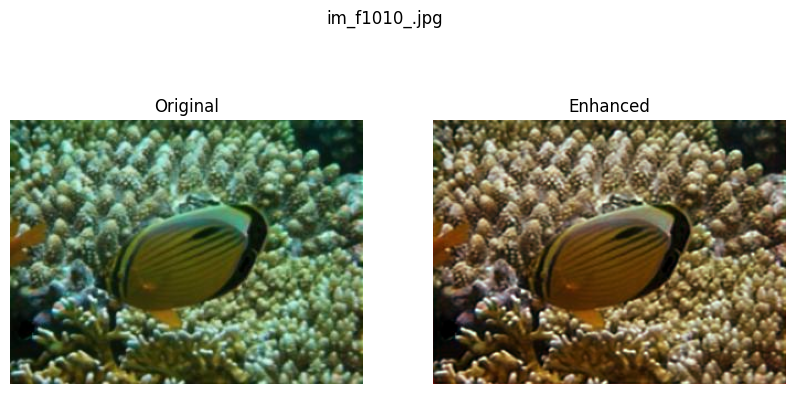

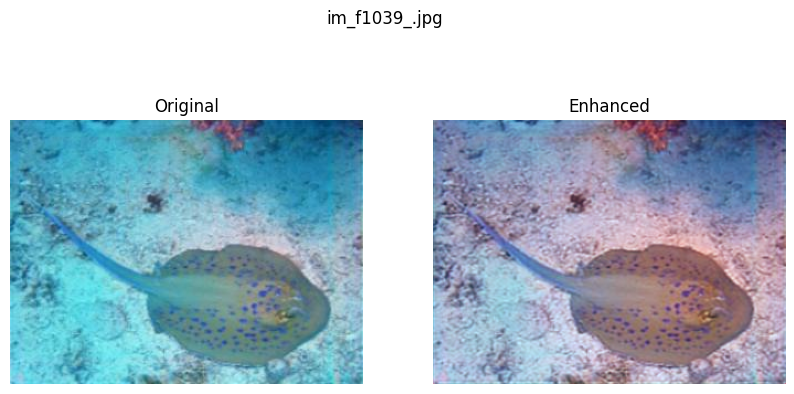

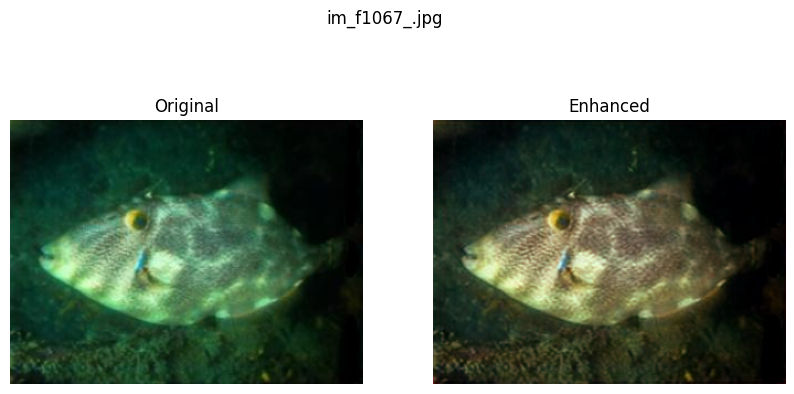

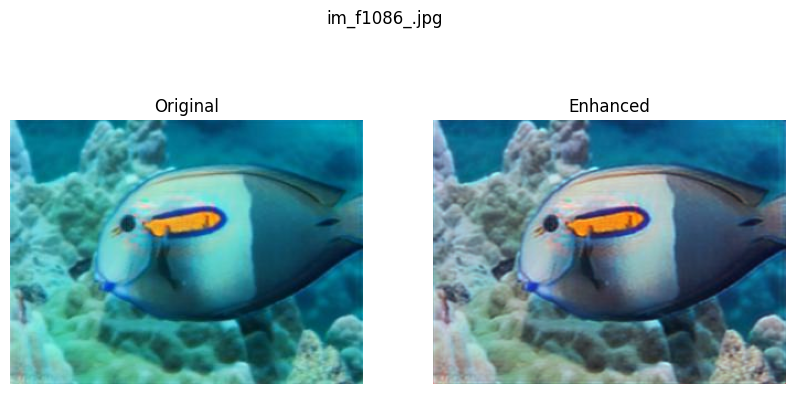

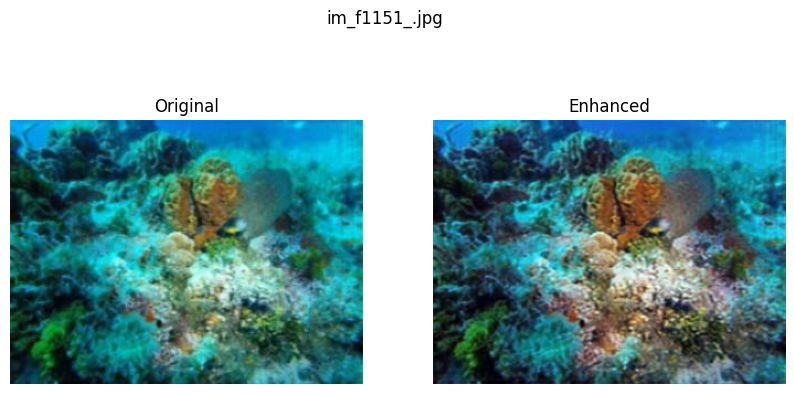

In [ ]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from model import PhysicalNN
import torch.nn as nn

# Paths - update these as needed
input_folder = "/content/drive/MyDrive/Colab Notebooks/underwater_images/underwater_scenes/validation"  # your folder with images
model_path = "/content/drive/MyDrive/Colab Notebooks/underwater_results/checkpoints/model_best_99.pth.tar"  # your trained model

# Load model
model = PhysicalNN()
model = nn.DataParallel(model).cuda()
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

def load_image(path):
    img = Image.open(path).convert('RGB')
    return img

def preprocess(img):
    transform = transforms.ToTensor()
    return transform(img).unsqueeze(0).cuda()

def postprocess(tensor):
    img_np = tensor.squeeze().cpu().clamp(0, 1).permute(1, 2, 0).numpy()
    return img_np

def visualize(orig_img, enhanced_img, img_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(orig_img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Enhanced')
    plt.imshow(enhanced_img)
    plt.axis('off')

    plt.suptitle(img_name)
    plt.show()

# List image files (png/jpg/jpeg)
image_files = sorted([f for f in os.listdir(input_folder) if f.lower().endswith(('.png','.jpg','.jpeg'))])

# Visualize first 5 images or fewer if less available
for img_file in image_files[:5]:
    img_path = os.path.join(input_folder, img_file)
    orig_img = load_image(img_path)
    input_tensor = preprocess(orig_img)

    with torch.no_grad():
        enhanced_tensor = model(input_tensor)

    enhanced_img = postprocess(enhanced_tensor)

    visualize(orig_img, enhanced_img, img_file)
